Follow the steps at: https://xds-dev.ecmwf.int/how-to-api
I would recommend saving in "\~/.cdsapirc_xds_dev" rather than "\~/.cdsapirc" so as not to disrupt any CDS credentials you might have set up.

In [25]:
# pip install "earthkit-data[all]" earthkit-plots

In [2]:
import yaml
from pathlib import Path
from zipfile import ZipFile
import xarray as xr
from cartopy import crs as ccrs, feature as cfeat
from matplotlib import pyplot as plt

with open(Path("~/.cdsapirc_xds_dev").expanduser(), "r") as f:
    credentials = yaml.safe_load(f)

In [3]:
import earthkit.data
import earthkit.plots
import earthkit as ek

In [4]:
import cdsapi

dataset = "ad4gd-air-quality"
request = {
    "variable": ["particulate_matter_d_2_5_µm"],
    "month": ["10"],
    "day": ["01", "02"],
    "area": [55.91, -4.4, 42.22, 14.65],
}

client = cdsapi.Client(**credentials)
filename = client.retrieve(dataset, request).download()

2025-04-15 14:00:46,260 INFO Request ID is 9bac3c2d-0b03-4dc2-9ec6-acbc9a429da4
2025-04-15 14:00:46,458 INFO status has been updated to accepted
2025-04-15 14:00:48,283 INFO status has been updated to running
2025-04-15 14:00:49,879 INFO status has been updated to successful


In [9]:
data = ek.data.from_source('file', filename)
dataset = data.to_xarray()
dataset

<xarray.Dataset> Size: 212MB
Dimensions:  (time: 48, lat: 871, lon: 1265)
Coordinates:
  * lat      (lat) float64 7kB 46.51 46.52 46.52 46.53 ... 55.18 55.19 55.2
  * lon      (lon) float64 10kB 2.005 2.015 2.025 2.035 ... 14.62 14.63 14.64
  * time     (time) datetime64[ns] 384B 2024-10-01 ... 2024-10-02T23:00:00
Data variables:
    pm2p5    (time, lat, lon) float32 212MB dask.array<chunksize=(24, 871, 1265), meta=np.ndarray>
Attributes:
    title:        PM2.5 mass concentration
    Conventions:  CF-1.8
    institution:  AD4GD
    source:       IoT sensor network
    history:      Created 2025-04-09 13:06:07.088825
    summary:      A high resolution dataset for particulate matter (PM2.5 and...
    license:      The dataset is distributed under the Licence to Use Coperni...
    references:   https://doi.org/10.5281/zenodo.10839023

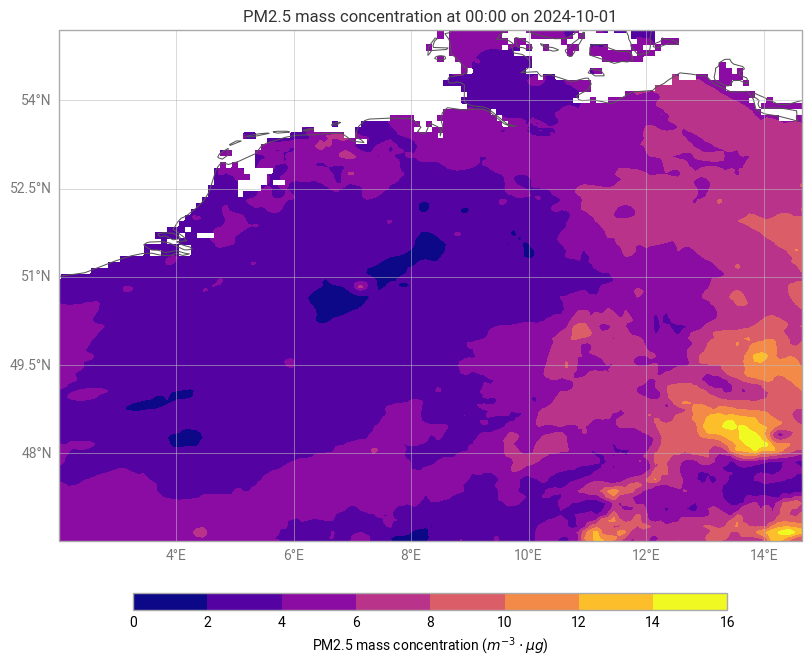

In [10]:
ek.plots.quickplot(dataset).show()

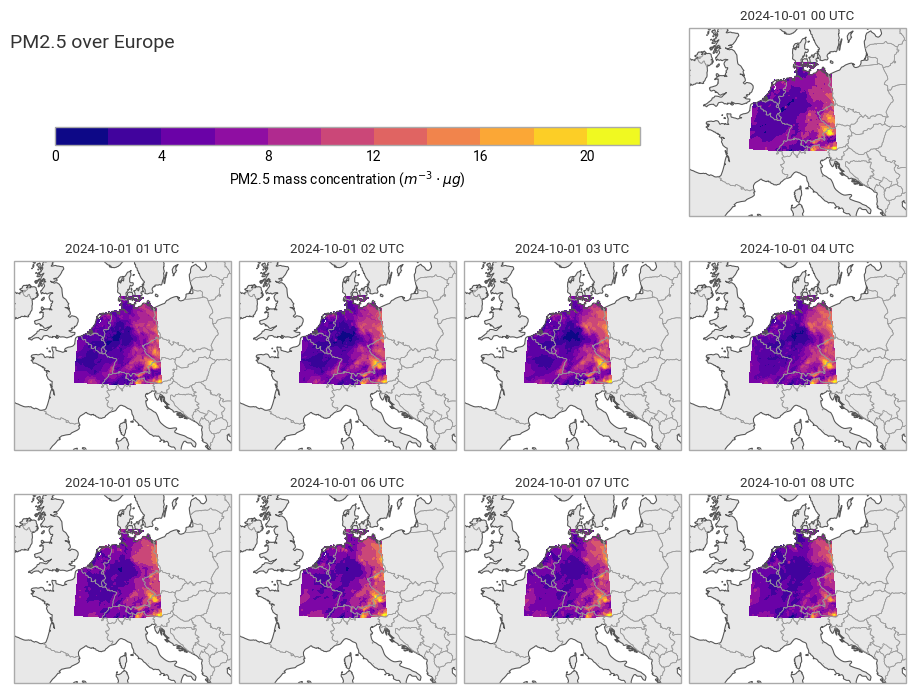

In [16]:
figure = earthkit.plots.Figure(domain=[-5, 23, 40, 58], size=(9, 7), rows=3, columns=4)

figure.add_map(0, 3)
for i in range(8):
    figure.add_map(1+i//4, i%4)

figure.contourf(data.sel(variable="pm2p5"))

figure.land()
figure.coastlines()
figure.borders()

ax = plt.axes((0.05, 0.8, 0.65, 0.025))
figure.legend(ax=ax)

figure.subplot_titles("{time:%Y-%m-%d %H} UTC")
figure.title(
    "PM2.5 over Europe",
    fontsize=14, horizontalalignment="left", x=0, y=0.96,
)

figure.show()